# Ford GoBike System Data

###### by Hager Mohamed

## Preliminary Wrangling

This document explores a dataset containing the trip data of the ford gobike approximately 183,412.


In [128]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [129]:
df = pd.read_csv('fordgobike-tripdata.csv')

### Assessment

In [130]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [131]:
df.shape

(183412, 16)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [133]:
df[df.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [134]:
df['member_gender'].value_counts()


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [135]:
df['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [136]:
df['user_type'].value_counts()


Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [137]:
df['start_station_name'].value_counts()


Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [138]:
df['start_station_id'].value_counts()


58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [139]:
df['end_station_name'].value_counts()


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [140]:
df['end_station_id'].value_counts()


67.0     4857
58.0     3973
21.0     3647
15.0     3368
3.0      2997
         ... 
51.0        9
300.0       7
224.0       6
344.0       6
301.0       5
Name: end_station_id, Length: 329, dtype: int64

#### From the assessment above here's the findings to be cleaned

1. remove unused features (coloumns)
2. remove nan values
3. extract start day,month and hour from start time and end time
4. extract start day from start time
5. calculate member age

## Data Wrangling

##### Define
1. remove unused features (coloumns)

##### Code

In [141]:
new_df = df[['duration_sec', 'start_time', 'end_time','start_station_name','end_station_name','bike_id','user_type','member_birth_year',
             'member_gender','bike_share_for_all_trip']].copy()


###### Test

In [142]:
new_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [143]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183215 non-null  object 
 4   end_station_name         183215 non-null  object 
 5   bike_id                  183412 non-null  int64  
 6   user_type                183412 non-null  object 
 7   member_birth_year        175147 non-null  float64
 8   member_gender            175147 non-null  object 
 9   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.0+ MB


###### Define

2. remove nan values

###### Code

In [144]:
new_df.dropna(axis=0,inplace=True)

###### Test

In [145]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_name       174952 non-null  object 
 4   end_station_name         174952 non-null  object 
 5   bike_id                  174952 non-null  int64  
 6   user_type                174952 non-null  object 
 7   member_birth_year        174952 non-null  float64
 8   member_gender            174952 non-null  object 
 9   bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.7+ MB


###### Define
3. convert start time and end time to datetime object

###### Code

In [146]:
new_df.start_time = pd.to_datetime(new_df.start_time)
new_df.end_time = pd.to_datetime(new_df.end_time)

###### Test

In [147]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  float64       
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 14.7+ MB


###### Define

4. extract start day,month and hour from start time and end time

###### Code

In [148]:
new_df['start_day']= new_df['start_time'].dt.strftime('%a')
new_df['start_month'] = new_df['start_time'].dt.strftime('%y-%m')
new_df['start_hour'] = new_df['start_time'].dt.hour

###### Test

In [149]:
new_df['start_day'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_day, dtype: int64

In [150]:
new_df['start_month'].value_counts()

19-02    174952
Name: start_month, dtype: int64

In [151]:
new_df['start_hour'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hour, dtype: int64

###### Define

5. calculate member age

###### Code

In [152]:
new_df['member_age'] = 2019-new_df.member_birth_year

###### Test

In [153]:
new_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thu,19-02,17,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thu,19-02,12,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,Thu,19-02,17,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,Thu,19-02,23,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,Thu,19-02,23,60.0


### What is the structure of your dataset?

The Dataset contains features about:
- trip duration: how long the trip took in seconds
- start time/end time: start/end date/time for the bike rides.
- stations: start/end station, name, geolocation (latitude/longitude)
- customer data: gender, birth date and user type
- rented bikes: bike id

The dataset has been enhanced with features that I find neccessary to perform analysis:

- rental time and duration
- customer: age,  gender
- most common stations
### What is/are the main feature(s) of interest in your dataset?

- rental time and duration
- customer: age,  gender, user type
- most common stations
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start_time: I extracted day that the trip starts on for further investigation(start_day).
- member_birth_year: to calculate the age and the relationship between age and trip duration
- member_gender
- user_type


## Univariate Exploration

### 1. Number of bikes used Daily

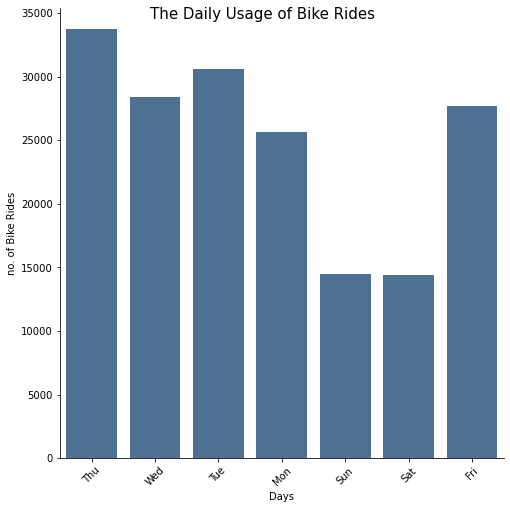

In [154]:
day_plot= sb.catplot(data=new_df, x='start_day', kind='count', color = '#41729F', height =7)
day_plot.set_axis_labels("Days", "no. of Bike Rides")
day_plot.set_xticklabels(rotation=45)
day_plot.fig.suptitle('The Daily Usage of Bike Rides', fontsize=15);

The above plot shows that the rides are highly used during the working days and less intresting in weekends
This might be an indicator to check which time slot per day rides are highly used

### 2. Number of Bike Rides Per hour

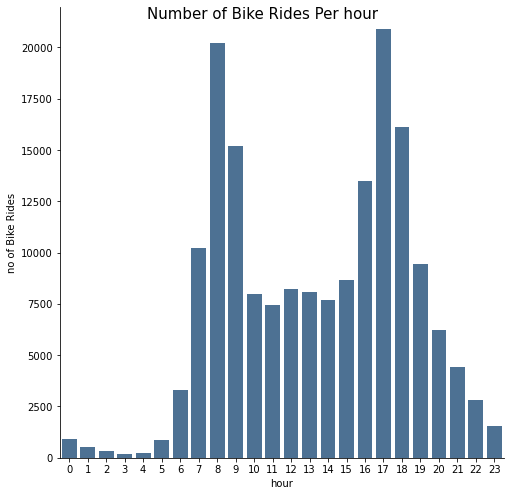

In [155]:
hour_plot = sb.catplot(data=new_df, x='start_hour', kind='count', color = '#41729F', height = 7)
hour_plot.set_axis_labels("hour", "no of Bike Rides")

hour_plot.fig.suptitle('Number of Bike Rides Per hour', fontsize=15);


The above plot confirms that bikes are used as transportation vehicle for work as it's highly used at 8:00 AM and 5:00 PM which is start and end of working day

### 3. Percentage of Bike Rides for Members Gender

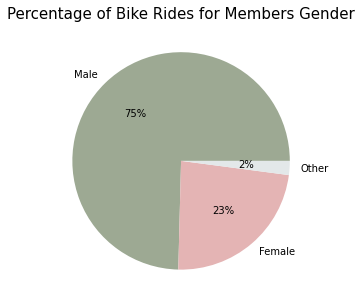

In [156]:
colors = ["#9DA993", "#E4B4B4", "#E3E8E9"]
plt.figure(figsize=(5,5))
plt.pie(new_df.member_gender.value_counts(), labels=new_df.member_gender.value_counts().keys(), colors=colors,autopct='%1.0f%%')
plt.title("Percentage of Bike Rides for Members Gender", fontsize=15)

plt.show()

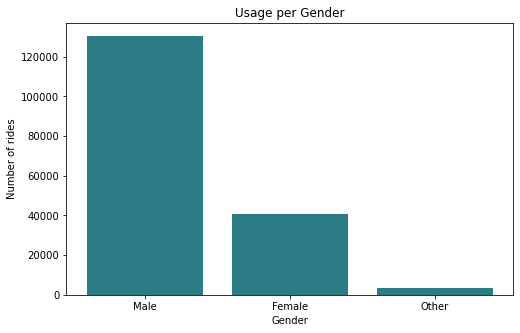

In [157]:
plt.figure(figsize=[8,5])
plt.bar(x = new_df.member_gender.value_counts().keys(), height = new_df.member_gender.value_counts(),color="#2B7C85" )
plt.title('Usage per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of rides')
plt.show()

The above 2 charts show that Male are the common users of the rental system

### 4. number of each user type

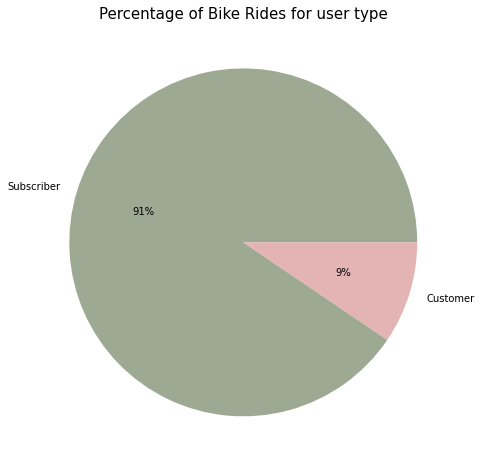

In [158]:
colors = ["#9DA993", "#E4B4B4"]
plt.figure(figsize=(8,8))
plt.pie(new_df.user_type.value_counts(), labels=new_df.user_type.value_counts().keys(), colors=colors,autopct='%1.0f%%')
plt.title("Percentage of Bike Rides for user type", fontsize=15)

plt.show()

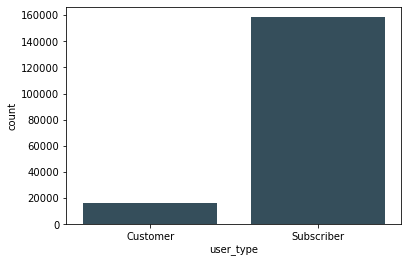

In [159]:
sb.countplot(data = new_df, x = 'user_type', color = "#2F5061");


'Subscriber' user are more than 'Customer' user.

### 5. Most and least start stations

Text(0, 0.5, 'number of occurance')

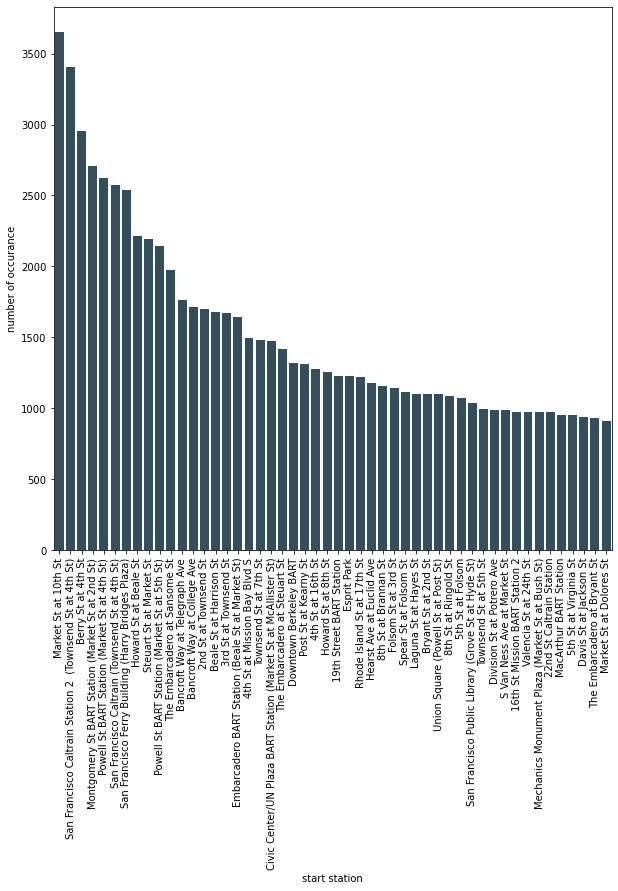

In [160]:
fig, ax = plt.subplots(figsize=(10, 10))
station_plot=sb.countplot(data=new_df, x='start_station_name', order=new_df.start_station_name.value_counts(ascending=False)[0:50].index,color = "#2F5061",ax=ax)
station_plot.set_xticklabels(labels=new_df.start_station_name.value_counts(ascending=False).keys(),rotation=90,size=10)
station_plot.set_yticklabels(labels=[i for i in range(0,4000,500)],size=10)
station_plot.set_xlabel('start station', fontsize=10)
station_plot.set_ylabel('number of occurance', fontsize=10)


Text(0, 0.5, 'number of occurance')

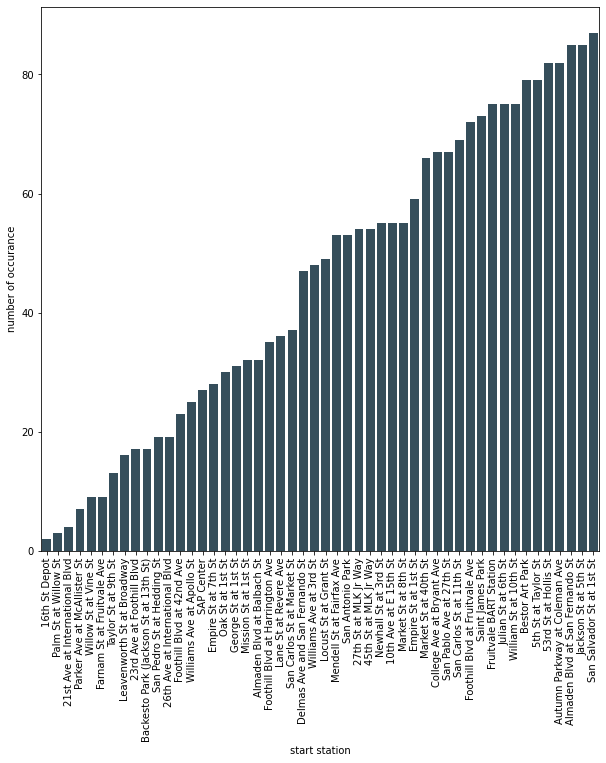

In [161]:
fig, ax = plt.subplots(figsize=(10, 10))
station_plot=sb.countplot(data=new_df, x='start_station_name', order=new_df.start_station_name.value_counts(ascending=True)[0:50].index,color = "#2F5061",ax=ax)
station_plot.set_xticklabels(labels=new_df.start_station_name.value_counts(ascending=True).keys(),rotation=90,size=10)
station_plot.set_yticklabels(labels=[i for i in range(0,200,20)],size=10)
station_plot.set_xlabel('start station', fontsize=10)
station_plot.set_ylabel('number of occurance', fontsize=10)

In [162]:
new_df.start_station_name.value_counts(ascending=True)[0:20]

16th St Depot                             2
Palm St at Willow St                      3
21st Ave at International Blvd            4
Parker Ave at McAllister St               7
Willow St at Vine St                      9
Farnam St at Fruitvale Ave                9
Taylor St at 9th St                      13
Leavenworth St at Broadway               16
23rd Ave at Foothill Blvd                17
Backesto Park (Jackson St at 13th St)    17
San Pedro St at Hedding St               19
26th Ave at International Blvd           19
Foothill Blvd at 42nd Ave                23
Williams Ave at Apollo St                25
SAP Center                               27
Empire St at 7th St                      28
Oak St at 1st St                         30
George St at 1st St                      31
Mission St at 1st St                     32
Almaden Blvd at Balbach St               32
Name: start_station_name, dtype: int64

The plot above shows the most and least common stations trips start from for example Market St at 10th St is the most common one then san francisco station 2 and so on for the ascending chart...etc This insight can be helpful where to do some offers for getting better income 

### 6. Ages interested in bike rents

Text(0.5, 1.0, 'Age Distribution for Member')

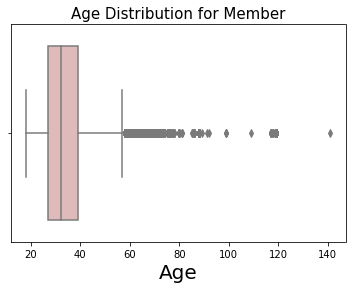

In [163]:
age = sb.boxplot(x=new_df.member_age, color='#E4B4B4')
age.set_xlabel('Age', fontsize=20)
age.set_title("Age Distribution for Member", fontsize=15)

The above plot shows the outliers in the member age that we need to clean it 

In [164]:
new_df=new_df[new_df.member_age <= 52]
new_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thu,19-02,17,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thu,19-02,12,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,Thu,19-02,17,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,Thu,19-02,23,45.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,Thu,19-02,23,36.0


Text(0.5, 1.0, 'Age Distribution for Member')

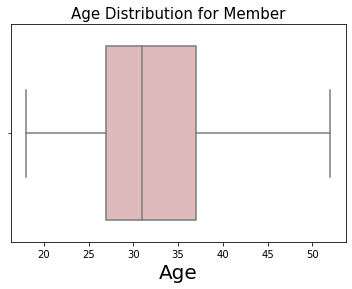

In [165]:
age = sb.boxplot(x=new_df.member_age, color='#E4B4B4')
age.set_xlabel('Age', fontsize=20)
age.set_title("Age Distribution for Member", fontsize=15)

The above to chheck if the outliers have been successfully removed

Text(0, 0.5, 'number of occurance')

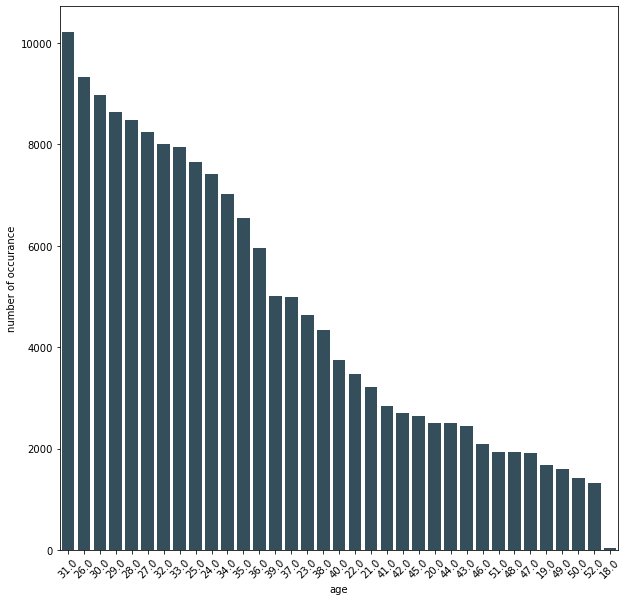

In [166]:
fig, ax = plt.subplots(figsize=(10, 10))
age=sb.countplot(data=new_df, x='member_age', order=new_df.member_age.value_counts(ascending=False).index,color = "#2F5061",ax=ax)
age.set_xticklabels(labels=new_df.member_age.value_counts(ascending=False).keys(),rotation=45,size=10)
age.set_yticklabels(labels=[i for i in range(0,10500,2000)],size=10)
age.set_xlabel('age', fontsize=10)
age.set_ylabel('number of occurance', fontsize=10)

In [167]:
new_df.member_age.value_counts(ascending=False)

31.0    10214
26.0     9323
30.0     8967
29.0     8640
28.0     8484
27.0     8245
32.0     8010
33.0     7953
25.0     7654
24.0     7420
34.0     7023
35.0     6557
36.0     5953
39.0     5011
37.0     4987
23.0     4637
38.0     4344
40.0     3756
22.0     3476
21.0     3208
41.0     2830
42.0     2706
45.0     2633
20.0     2504
44.0     2503
43.0     2435
46.0     2080
51.0     1927
48.0     1924
47.0     1909
19.0     1675
49.0     1590
50.0     1414
52.0     1315
18.0       34
Name: member_age, dtype: int64

The plot above shows that most common age interested in bike rental is almost 30 years old people

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I cleand all variables that need to clean like change the date to datetime object,removed nan values, caclulated member age and removed the outliers. So, I think my dataset is ready to visualization.
Everything was normal like at the weekend the rides was decreased and on the sleeping tims as well.
Also noticed that it's commonly used daily on 8:00 AM and 5:00 PM (before and after work)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes,I've performed some operations on the data especially member age as the distribution shows that there were outliers should be cleaned, I've also changed a lil bit in the structure of the data (data types and some drived coloumns) for ease of visualization and investigation

## Bivariate Exploration

### 1. The Daily Usage of Bike Rides Per Gender

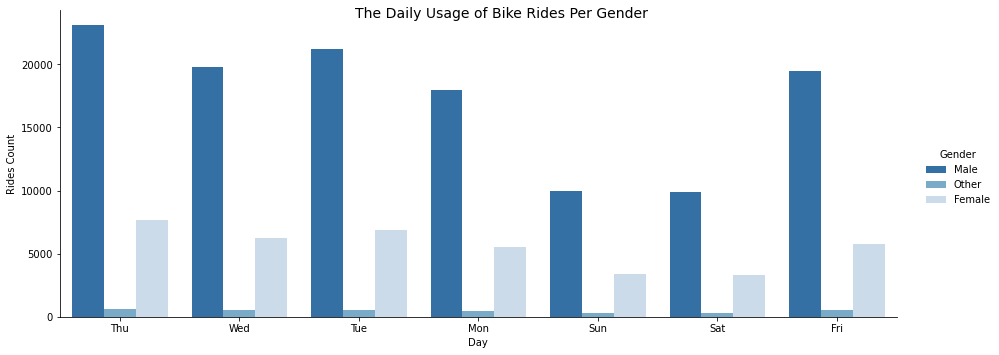

In [168]:
day_to_gender = sb.catplot(data=new_df, x='start_day', hue='member_gender', kind='count',aspect=20.7/8.27,palette='Blues_r')
day_to_gender.set_axis_labels('Day', 'Rides Count')
day_to_gender._legend.set_title('Gender')
day_to_gender.fig.suptitle('The Daily Usage of Bike Rides Per Gender', fontsize=14);

The above plot shows that male are always themost intrested gender in bike rent.

### 2. The Daily Usage of Bike Rides Per user type

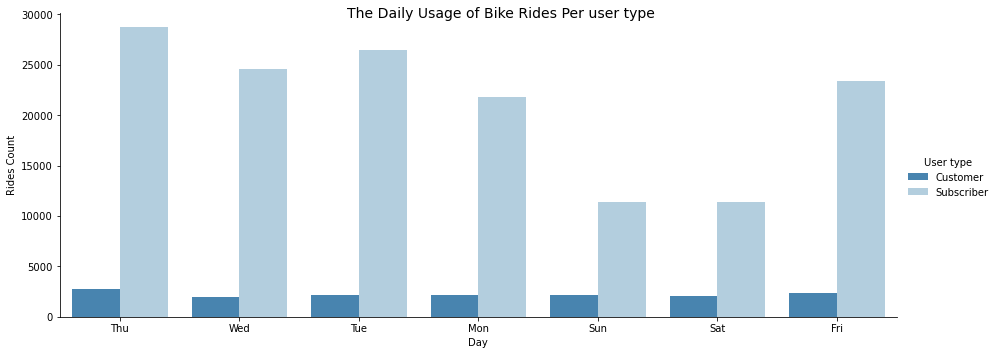

In [169]:
day_to_gender = sb.catplot(data=new_df, x='start_day', hue='user_type', kind='count',aspect=20.7/8.27,palette='Blues_r')
day_to_gender.set_axis_labels('Day', 'Rides Count')
day_to_gender._legend.set_title('User type')
day_to_gender.fig.suptitle('The Daily Usage of Bike Rides Per user type', fontsize=14);

The previous figure it is show the number of rides (trips) based on the user type.
It's more used by subscribers

### 3. The hourly Usage of Bike Rides Per gender

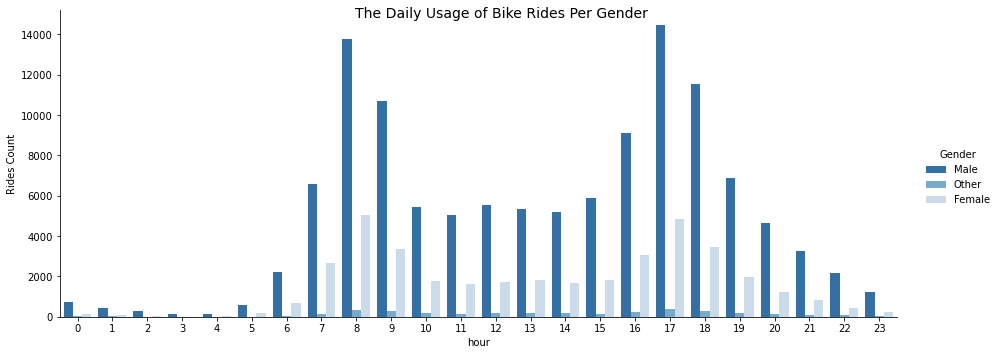

In [170]:
hour_to_gender = sb.catplot(data=new_df, x='start_hour', hue='member_gender', kind='count',aspect=20.7/8.27,palette='Blues_r')
hour_to_gender.set_axis_labels('hour', 'Rides Count')
hour_to_gender._legend.set_title('Gender')
hour_to_gender.fig.suptitle('The Daily Usage of Bike Rides Per Gender', fontsize=14);

The above plot shows males are more into bike rent in start and end of working days and so for females as the appear more during this period

### 4. The hourly Usage of Bike Rides Per user type

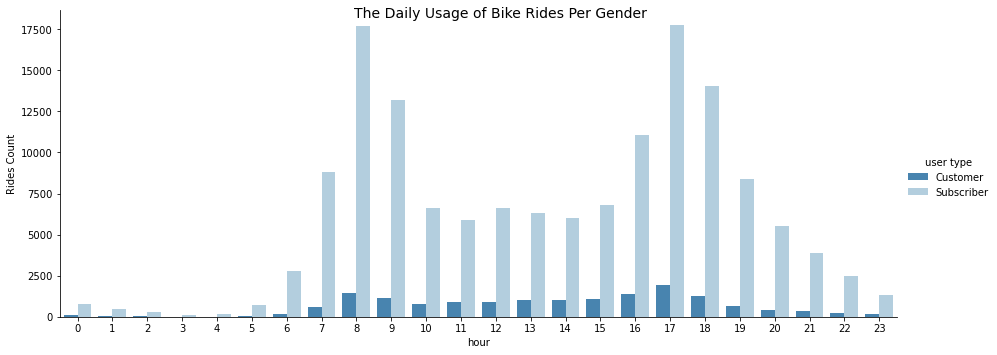

In [171]:
hour_to_usertype = sb.catplot(data=new_df, x='start_hour', hue='user_type', kind='count',aspect=20.7/8.27,palette='Blues_r')
hour_to_usertype.set_axis_labels('hour', 'Rides Count')
hour_to_usertype._legend.set_title('user type')
hour_to_usertype.fig.suptitle('The Daily Usage of Bike Rides Per Gender', fontsize=14);

number of customers increases slightly in start and end of working hours. maybe this insights can be helpful to gain more subscribers

### 5. Trip duration for user type

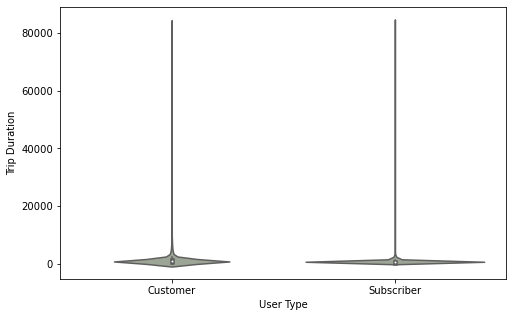

In [172]:
fig, ax = plt.subplots(figsize=(8, 5))
sb.violinplot(data=new_df, x='user_type', y='duration_sec', color='#9DA993',ax=ax);
plt.xlabel('User Type');
plt.ylabel('Trip Duration');

The trip duration distribution is narrower for subscribers than customers. Maybe subscribers have a more specific usage.

### 6. Ages rent bikes during the week

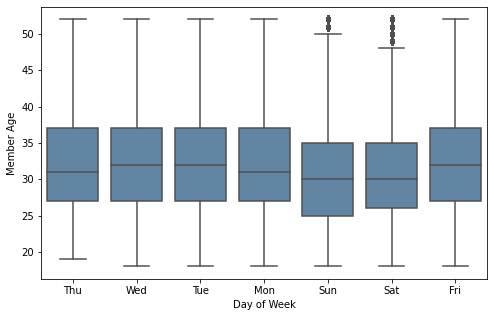

In [173]:
fig, ax = plt.subplots(figsize=(8, 5))
sb.boxplot(data=new_df, x='start_day', y='member_age', color='#5885AF',ax=ax);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

Seems that the rides are used by older people from Monday to Friday and younger people on weekends

### 7. Types of users per gender

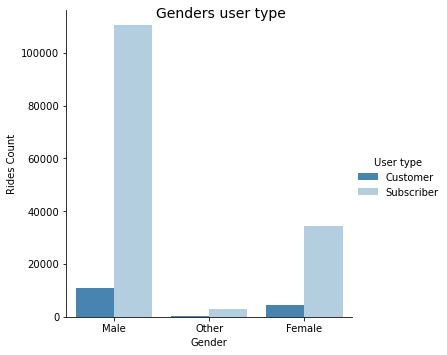

In [174]:
type_to_gender = sb.catplot(data=new_df, x='member_gender', hue='user_type', kind='count',palette='Blues_r')
type_to_gender.set_axis_labels('Gender', 'Rides Count')
type_to_gender._legend.set_title('User type')
type_to_gender.fig.suptitle('Genders user type', fontsize=14);

We have subscribers from all genders but more from males

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. Thursday has the most rides and especially for males
2. Bike rental is more used by subscribers
3. Males are more into bike rent in start and end of working days and so for females as the appear more during this period
4. Number of customers increases slightly in start and end of working hours. maybe this insights can be helpful to gain more subscribers
5. Maybe subscribers have a more specific usage
6. Seems that the rides are used by older people from Monday to Friday and younger people on weekends
7. We have subscribers from all genders but more from males

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When I investigated the distribution of rides for each user type I found that subscribers use it during the whole week and increases in start and of working day maybe it's used as way of transportation and noticed that they also have specific usage unlike the customers maybe use it for fun or sport 

## Multivariate Exploration

### 1. Daily Usage of Bike Rides per User Type Based on Gender

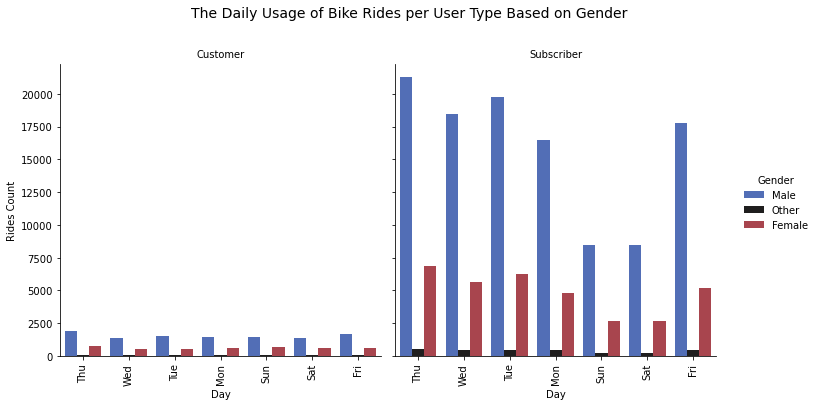

In [175]:
type_gender_usage = sb.catplot(data=new_df, x='start_day', col="user_type", hue='member_gender', kind='count'
                               ,palette='icefire')

type_gender_usage.set_axis_labels('Day', 'Rides Count')
type_gender_usage.set_xticklabels(rotation=90)
type_gender_usage._legend.set_title('Gender')
type_gender_usage.set_titles('{col_name}')
type_gender_usage.fig.suptitle('The Daily Usage of Bike Rides per User Type Based on Gender', fontsize=14, y=1.09);

The plot above shows daily usage of bike rides per type based on gender and seems that males are the most subscribers achieve ride counts

### 2. hourly Usage of Bike Rides per User Type Based on Gender

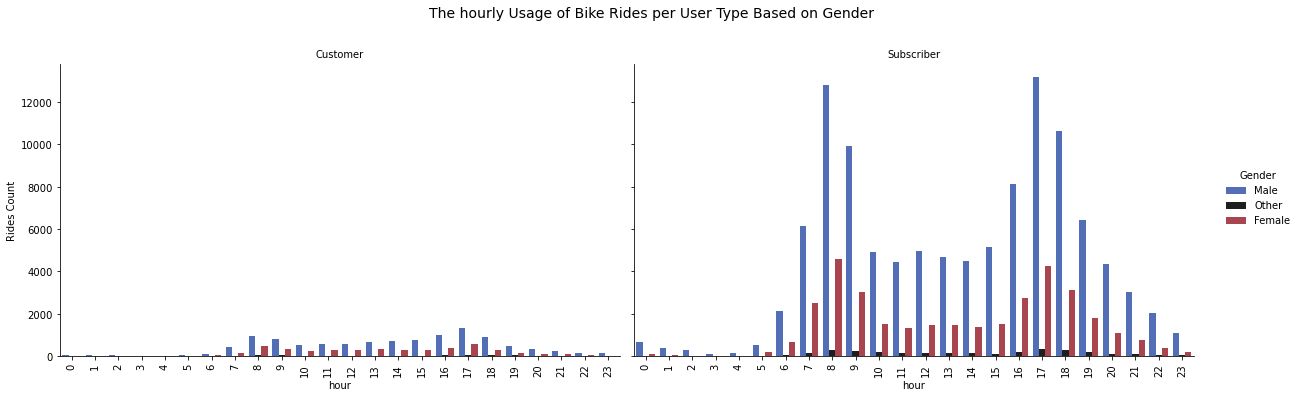

In [215]:
type_gender_usage = sb.catplot(data=new_df, x='start_hour', col="user_type", hue='member_gender',aspect=20/12, kind='count'
                               ,palette='icefire')

type_gender_usage.set_axis_labels('hour', 'Rides Count')
type_gender_usage.set_xticklabels(rotation=90)
type_gender_usage._legend.set_title('Gender')
type_gender_usage.set_titles('{col_name}')
type_gender_usage.fig.suptitle('The hourly Usage of Bike Rides per User Type Based on Gender', fontsize=14, y=1.09);

The plot above shows hourly usage of bike rides per type based on gender and seems that males are the most subscribers achieve ride counts

### 3.Trip Duration for Each User Type Based on Gender

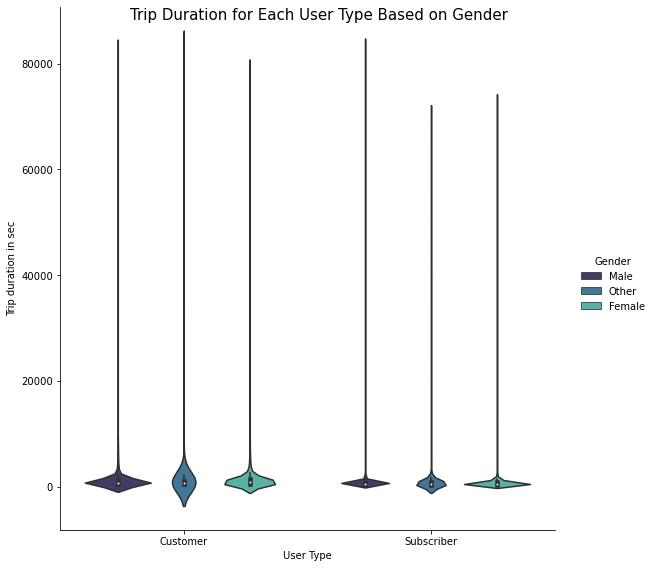

In [205]:
ax = sb.catplot(data=new_df, x='user_type', y="duration_sec", hue="member_gender", kind="violin", height=8,palette='mako')

ax.set_axis_labels("User Type", "Trip duration in sec")
ax._legend.set_title('Gender')
ax.fig.suptitle('Trip Duration for Each User Type Based on Gender', fontsize=15);

The plot above shows that each gender has a wider distribution as a customer than subscriber.This distribution indicates that maybe subscribers have specific road or usage

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!